# PURCHASE ANALYTICS

## Details

Comparing the purchases of 2 different type of chocolate bars in a local supermarket store 

Each observation is a transaction linked to a specific customer based on the royalty program per day.

theres a total of 500 customers with diffent purchase patters tracked over the laps of 2 years.



| Variable            | Data Type   | Range                      | Description                                                                 |
|---------------------|-------------|-----------------------------|-----------------------------------------------------------------------------|
| ID                  | numerical   | Integer                    | Shows a unique identificator of a customer.                                 |
| Day                 | numerical   | Integer                    | Day when the customer has visited the store                                 |
| Incidence           | categorical | {0,1}                      | Purchase Incidence                                                          |
|                     |             | 0                          | The customer has not purchased an item from the category of interest        |
|                     |             | 1                          | The customer has purchased an item from the category of interest            |
| Brand               | categorical | {0,1,2,3,4,5}              | Shows which brand the customer has purchased                                |
|                     |             | 0                          | No brand was purchased                                                      |
|                     |             | 1,2,3,4,5                  | Brand ID                                                                    |
| Quantity            | numerical   | Integer                    | Number of items bought by the customer from the product category of interest|
| Last_Inc_Brand      | categorical | {0,1,2,3,4,5}              | Brand purchased during the previous store visit                             |
|                     |             | 0                          | No brand was purchased                                                      |
|                     |             | 1,2,3,4,5                  | Brand ID                                                                    |
| Last_Inc_Quantity   | numerical   | Integer                    | Quantity bought during previous store visit                                 |
| Price_1             | numerical   | Real                       | Price of an item from Brand 1 on a particular day                           |
| Price_2             | numerical   | Real                       | Price of an item from Brand 2 on a particular day                           |
| Price_3             | numerical   | Real                       | Price of an item from Brand 3 on a particular day                           |
| Price_4             | numerical   | Real                       | Price of an item from Brand 4 on a particular day                           |
| Price_5             | numerical   | Real                       | Price of an item from Brand 5 on a particular day                           |
| Promotion_1         | categorical | {0,1}                      | Whether Brand 1 was on promotion                                            |
|                     |             | 0                          | There is no promotion                                                       |
|                     |             | 1                          | There is promotion                                                          |
| Promotion_2         | categorical | {0,1}                      | Whether Brand 2 was on promotion                                            |
|                     |             | 0                          | There is no promotion                                                       |
|                     |             | 1                          | There is promotion                                                          |
| Promotion_3         | categorical | {0,1}                      | Whether Brand 3 was on promotion                                            |
|                     |             | 0                          | There is no promotion                                                       |
|                     |             | 1                          | There is promotion                                                          |
| Promotion_4         | categorical | {0,1}                      | Whether Brand 4 was on promotion                                            |
|                     |             | 0                          | There is no promotion                                                       |
|                     |             | 1                          | There is promotion                                                          |
| Promotion_5         | categorical | {0,1}                      | Whether Brand 5 was on promotion                                            |
|                     |             | 0                          | There is no promotion                                                       |
|                     |             | 1                          | There is promotion                                                          |
| Sex                 | categorical | {0,1}                      | Biological sex (gender) of a customer                                       |
|                     |             | 0                          | Male                                                                         |
|                     |             | 1                          | Female                                                                       |
| Marital status      | categorical | {0,1}                      | Marital status of a customer                                                |
|                     |             | 0                          | Single                                                                       |
|                     |             | 1                          | Non-single (divorced / separated / married / widowed)                       |
| Age                 | numerical   | Integer (18–75)           | Age of the customer in years                                                |
| Education           | categorical | {0,1,2,3}                  | Level of education of the customer                                          |
|                     |             | 0                          | Other / unknown                                                              |
|                     |             | 1                          | High school                                                                  |
|                     |             | 2                          | University                                                                   |
|                     |             | 3                          | Graduate school                                                              |
| Income              | numerical   | Real (38247–309364)       | Annual income in USD                                                        |
| Occupation          | categorical | {0,1,2}                    | Category of occupation                                                      |
|                     |             | 0                          | Unemployed / unskilled                                                      |
|                     |             | 1                          | Skilled employee / official                                                 |
|                     |             | 2                          | Management / self-employed / highly qualified / officer                     |
| Settlement size     | categorical | {0,1,2}                    | City size where the customer lives                                          |
|                     |             | 0                          | Small city                                                                   |
|                     |             | 1                          | Mid-sized city                                                               |
|                     |             | 2                          | Big city                                                                     |


# START

In [69]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [70]:
df_purchase = pd.read_csv('./Datasets/purchase data.csv')
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


Data does not contain equal number of record per customer per day (some visited the store more than others). Descriptive statistics is not usefull in this case.

In [71]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Applying Segmentation

In [72]:
#Import
scaler = pickle.load(open('./Pickle_jar/Scaler.pickle', 'rb'))

pca = pickle.load(open('./Pickle_jar/pca.pickle', 'rb'))

kmeans_pca = pickle.load(open('./Pickle_jar/kmean_pca4', 'rb')) # we are using the PCA with 4 segments or 'kmean_pca4'





we will not fit scaler and PCA, we only need to transfor the data.

## Scaler


In [73]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']] # These are the same features as in the segmentation part
df_purchase_segm_std = scaler.transform(features)

## PCA

In [74]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std) 

/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


Since the same costumer can appear more than one time, this will generate some duplicates

In [75]:
print("Shape of df_purchase_segm_pca:", df_purchase_segm_pca.shape)

Shape of df_purchase_segm_pca: (58693, 4)


## K-mean PCA

In [76]:
df_purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [77]:
df_purchase_predictors = df_purchase.copy()

In [78]:
df_purchase_predictors['Segment']  = df_purchase_segm_kmeans_pca

# Analysis by Segment 

## By Customer

In [79]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [80]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns= {'Incidence':'Num of Visits'})
temp1.head()

,Num of Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [81]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence':'Num of Purchases'}) #they came to the store and atually bought chocolate
temp3 = temp1.join(temp2)
temp3.head()

,Num of Visits,Num of Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [82]:
temp3["Average num of Purchases"] = temp3['Num of Purchases']/temp3['Num of Visits']

In [83]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr.head()


,Num of Visits,Num of Purchases,Average num of Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,0.0
200000005,111,13,0.117117,2.0


## By Segment

In [84]:
segm_proportion = df_purchase_descr[['Num of Purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0] 
segm_proportion = segm_proportion.rename(columns={'Num of Purchases': 'Segments Proportions'})
segm_proportion.head()

,Segments Proportions
Segment,
0.0,0.358
1.0,0.158
2.0,0.288
3.0,0.196


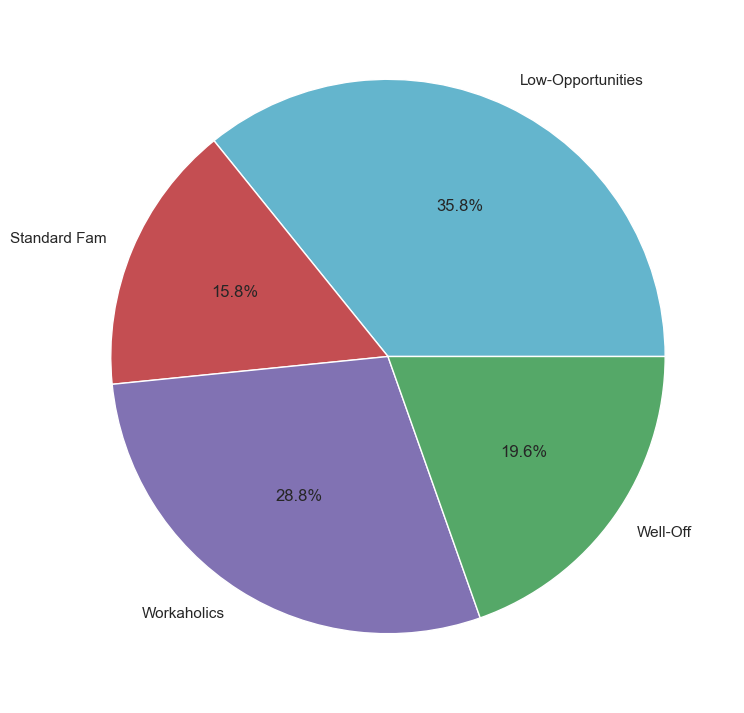

In [ ]:
plt.figure(figsize= (12,9))
plt.pie(segm_proportion['Segments Proportions'],
            labels= ['Low-Opportunities','Standard Fam','Workaholics','Well-Off'],
            autopct= '%1.1f%%',
            colors= ('c','r','m','g')) 
plt.show()






# Purchase Occasion and Incidence

In [86]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,Num of Visits,Num of Purchases,Average num of Purchases
Segment,,,
0.0,114.201117,22.910615,0.202560
1.0,119.265823,27.556962,0.230552
2.0,120.243056,34.736111,0.256846
3.0,117.489796,34.265306,0.281408


In [87]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

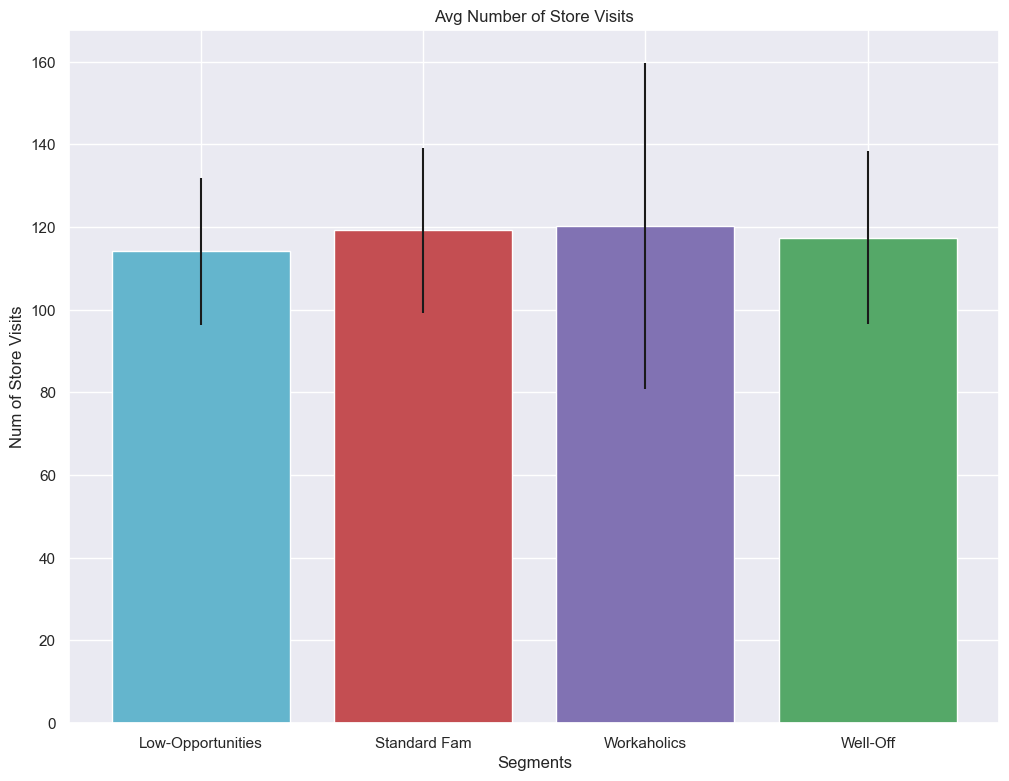

In [88]:
plt.figure(figsize= (12,9))
plt.bar(x = (0,1,2,3),
        tick_label= ('Low-Opportunities','Standard Fam','Workaholics','Well-Off'),
        height= segments_mean['Num of Visits'],
        yerr = segments_std['Num of Visits'],
        color= ('c','r','m','g'))

plt.xlabel('Segments')
plt.ylabel('Num of Store Visits')
plt.title('Avg Number of Store Visits')
plt.show()



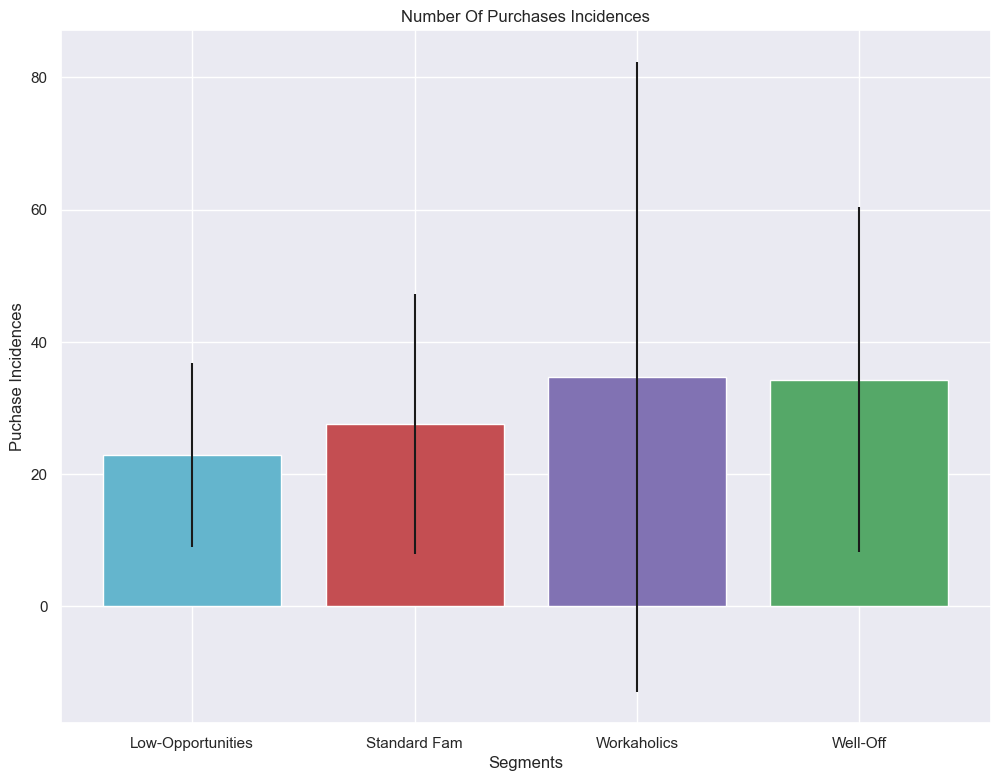

In [89]:
plt.figure(figsize= (12,9))
plt.bar(x = (0,1,2,3),
        tick_label= ('Low-Opportunities','Standard Fam','Workaholics','Well-Off'),
        height= segments_mean['Num of Purchases'],
        yerr = segments_std['Num of Purchases'],
        color= ('c','r','m','g'))

plt.xlabel('Segments')
plt.ylabel('Puchase Incidences')
plt.title('Number of purchases incidences'.title())
plt.show()


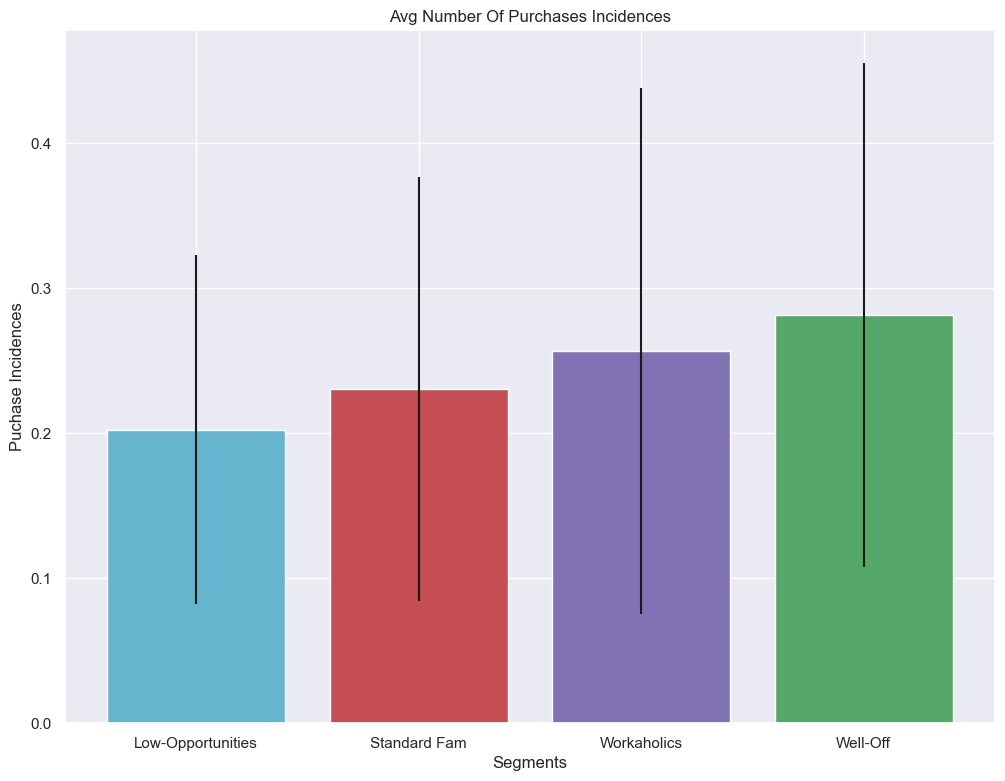

In [90]:
plt.figure(figsize= (12,9))
plt.bar(x = (0,1,2,3),
        tick_label= ('Low-Opportunities','Standard Fam','Workaholics','Well-Off'),
        height= segments_mean['Average num of Purchases'],
        yerr = segments_std['Average num of Purchases'],
        color= ('c','r','m','g'))

plt.xlabel('Segments')
plt.ylabel('Puchase Incidences')
plt.title('Avg Number of purchases incidences'.title())
plt.show()



# Brand Choise

In [91]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,2
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,2
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,2
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,2


In [92]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_' )
brand_dummies['Segments'], brand_dummies['ID'] = df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segments,ID
6,False,True,False,False,False,2,200000001
11,False,False,False,False,True,2,200000001
19,True,False,False,False,False,2,200000001
24,False,False,False,True,False,2,200000001
29,False,True,False,False,False,2,200000001
...,...,...,...,...,...,...,...
58621,False,True,False,False,False,2,200000500
58648,True,False,False,False,False,2,200000500
58674,False,True,False,False,False,2,200000500
58687,False,True,False,False,False,2,200000500


In [93]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()

In [94]:
mean_brand_choice = temp.groupby(['Segments'],as_index = True).mean()

Text(0.5, 1.0, 'Average Brand Choise By Segment')

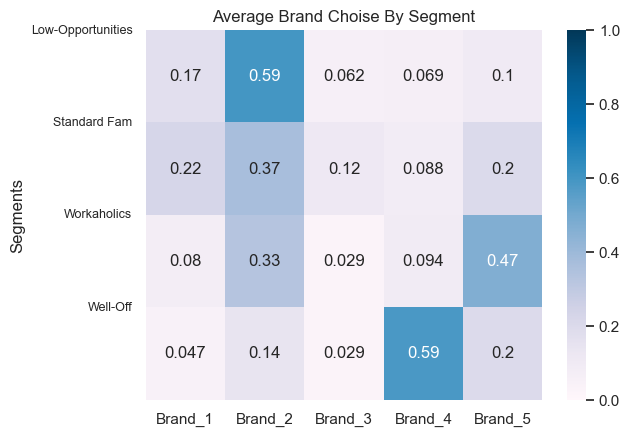

In [95]:
sns.heatmap(mean_brand_choice,
            vmin=0,
            vmax=1,
            cmap='PuBu',
            annot= True)

plt.yticks([0,1,2,3],['Low-Opportunities','Standard Fam','Workaholics','Well-Off'], rotation = 0, fontsize = 9)
plt.title('Average Brand Choise by segment'.title())

# REV

In [96]:
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 1 ].copy()
temp['REV Brand 1'] = temp['Price_1'] * temp['Quantity']

segment_brand_rev = pd.DataFrame()
segment_brand_rev[['Segment','REV Brand 1']] = temp[['Segment','REV Brand 1']].groupby(['Segment'], as_index=False).sum()
segment_brand_rev

,Segment,REV Brand 1
0,0,2796.44
1,1,1880.84
2,2,912.12
3,3,716.25


In [97]:
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 2 ].copy()
temp['REV Brand 2'] = temp['Price_2'] * temp['Quantity']


segment_brand_rev[['Segment','REV Brand 2']] = temp[['Segment','REV Brand 2']].groupby(['Segment'], as_index=False).sum()

In [98]:
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 3 ].copy()
temp['REV Brand 3'] = temp['Price_3'] * temp['Quantity']


segment_brand_rev[['Segment','REV Brand 3']] = temp[['Segment','REV Brand 3']].groupby(['Segment'], as_index=False).sum()

In [99]:
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 4 ].copy()
temp['REV Brand 4'] = temp['Price_4'] * temp['Quantity']


segment_brand_rev[['Segment','REV Brand 4']] = temp[['Segment','REV Brand 4']].groupby(['Segment'], as_index=False).sum()

In [100]:
temp =  df_purchase_predictors[df_purchase_predictors['Brand'] == 5 ].copy()
temp['REV Brand 5'] = temp['Price_5'] * temp['Quantity']


segment_brand_rev[['Segment','REV Brand 5']] = temp[['Segment','REV Brand 5']].groupby(['Segment'], as_index=False).sum()


In [101]:
segment_brand_rev['Total Rev'] = (segment_brand_rev['REV Brand 1']+
                                  segment_brand_rev['REV Brand 2']+
                                  segment_brand_rev['REV Brand 3']+
                                  segment_brand_rev['REV Brand 4']+
                                  segment_brand_rev['REV Brand 5'] )

segment_brand_rev

,Segment,REV Brand 1,REV Brand 2,REV Brand 3,REV Brand 4,REV Brand 5,Total Rev
0,0,2796.44,11603.18,2378.88,1893.63,2630.93,21303.06
1,1,1880.84,3488.22,2321.11,1347.86,3937.17,12975.20
2,2,912.12,5222.99,603.79,2268.95,17547.89,26555.74
3,3,716.25,1453.92,717.74,13529.66,5505.01,21922.58


In [102]:
segment_brand_rev['Segment Proportions'] = segm_proportion['Segments Proportions']
segment_brand_rev['Segment'] = segment_brand_rev['Segment'].map({0:'Low-Opportunities',
                                                                 1:'Standard Fam',
                                                                 2:'Workaholics',
                                                                 3:'Well-Off'})
segment_brand_rev = segment_brand_rev.set_index(['Segment'])
segment_brand_rev

,REV Brand 1,REV Brand 2,REV Brand 3,REV Brand 4,REV Brand 5,Total Rev,Segment Proportions
Segment,,,,,,,
Low-Opportunities,2796.44,11603.18,2378.88,1893.63,2630.93,21303.06,0.358
Standard Fam,1880.84,3488.22,2321.11,1347.86,3937.17,12975.20,0.158
Workaholics,912.12,5222.99,603.79,2268.95,17547.89,26555.74,0.288
Well-Off,716.25,1453.92,717.74,13529.66,5505.01,21922.58,0.196
